In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/content/combinedCoded.csv")
data.head()

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Muscle stiffness Muscle,Alopecia,Diabetes
0,38.060144,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27.000000,0,0,0,0,0,0,0,0,1,1,0,0,0
2,55.000000,1,1,0,1,1,1,0,1,0,1,0,0,1
3,54.000000,0,1,0,1,0,1,0,1,0,0,1,0,1
4,69.000000,1,0,0,0,0,0,1,0,1,1,0,0,1


In [6]:
columns = data.columns

In [7]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data.iloc[:, [0]] = scale.fit_transform(data.iloc[:, [0]])

In [8]:
data.head()

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Muscle stiffness Muscle,Alopecia,Diabetes
0,0.350752,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.212500,0,0,0,0,0,0,0,0,1,1,0,0,0
2,0.562500,1,1,0,1,1,1,0,1,0,1,0,0,1
3,0.550000,0,1,0,1,0,1,0,1,0,0,1,0,1
4,0.737500,1,0,0,0,0,0,1,0,1,1,0,0,1


In [9]:
x = data.drop(['Diabetes '], axis = 1)
y = data['Diabetes ']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [11]:
pip install shap

     |████████████████████████████████| 356 kB 4.0 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491639 sha256=2cd8dde40ab28f53e0711be2fbf6122975dd15138b540944469945444cb64057
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [12]:
import shap
def show_shap(model):
  explainer = shap.Explainer(model.predict, x_train, feature_names= columns)
  svalues = explainer(x_test)
  shap.summary_plot(svalues)
  shap.plots.bar(svalues, max_display=20)

  #store SHAP values of every feature
  values = []
  for i in range(svalues.values.shape[1]):
    a=0
    for j in range(svalues.values.shape[0]):
      a += abs(svalues.values[j][i])
    mean = a/svalues.values.shape[0]
    values.append("{:.3f}".format(mean))
  return values

def shap_value_data(shap_values, data):
  data_frame = pd.DataFrame([values,], columns=columns[:13])
  return pd.concat([data, data_frame], ignore_index= True)


###**Logistic Regression**

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

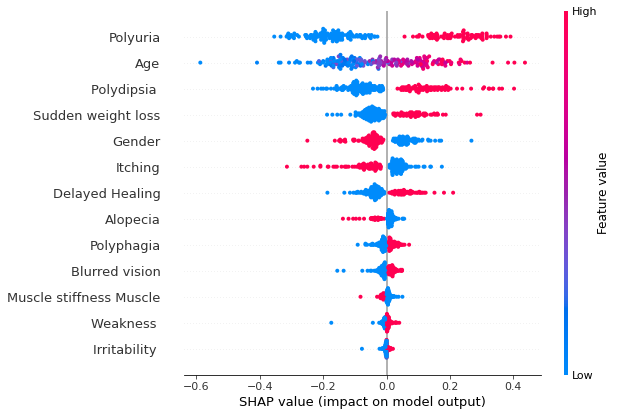

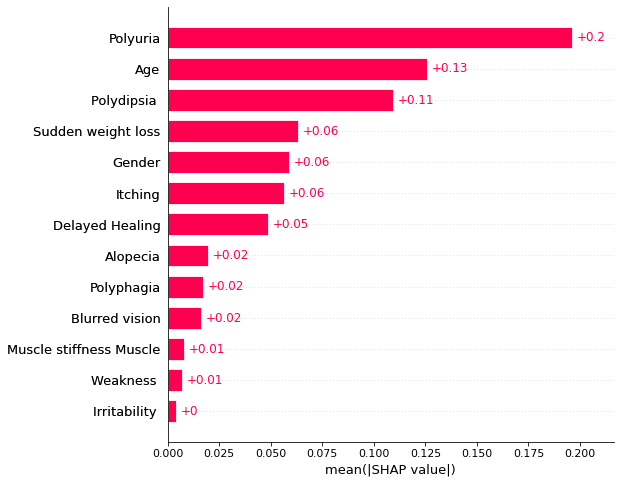

In [14]:
values = show_shap(lr)

In [15]:
shap_data = pd.DataFrame([values,], columns=columns[:13])

In [16]:
shap_data

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Muscle stiffness Muscle,Alopecia
0,0.126,0.059,0.196,0.109,0.017,0.063,0.007,0.049,0.016,0.057,0.004,0.008,0.019


###**KNN**

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Permutation explainer: 217it [02:24,  1.50it/s]


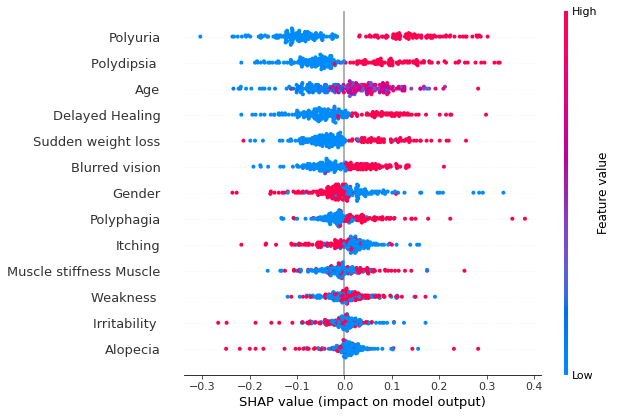

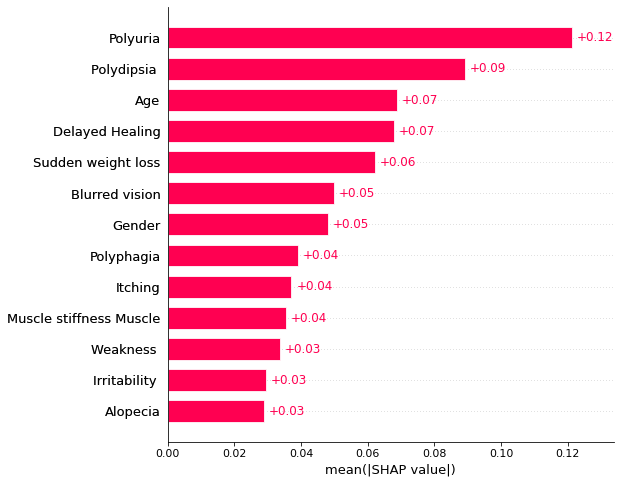

In [18]:
values = show_shap(knn)
shap_data = shap_value_data(values, shap_data)

###**Support Vector Classifier**

In [19]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Permutation explainer: 217it [00:39,  5.47it/s]


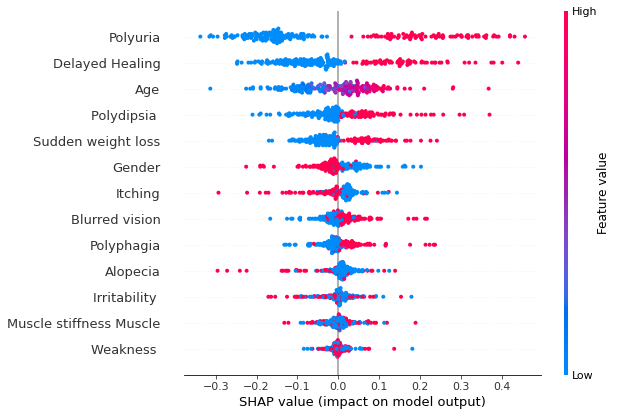

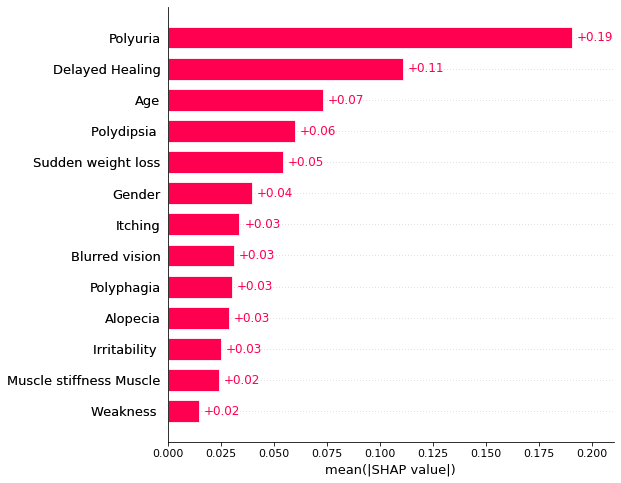

In [20]:
values = show_shap(svc)
shap_data = shap_value_data(values, shap_data)

###**Naive Bayes**

In [21]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

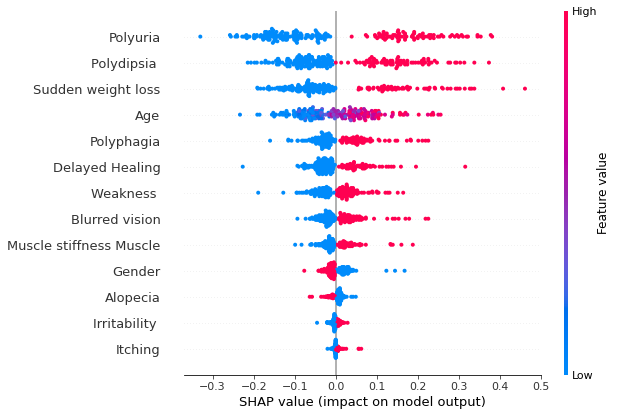

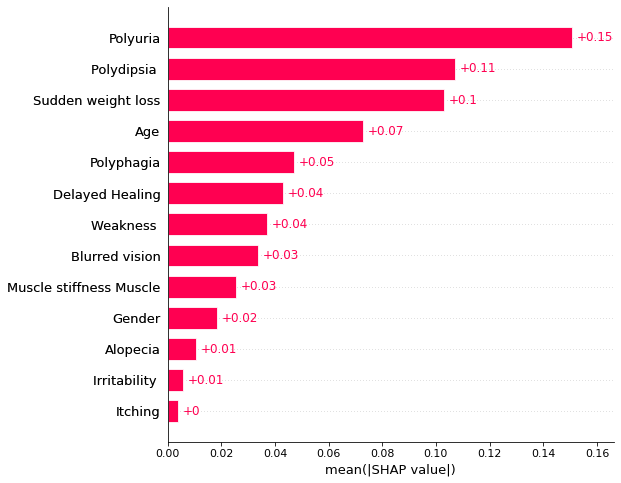

In [22]:
values = show_shap(nb)
shap_data = shap_value_data(values, shap_data)

###**Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

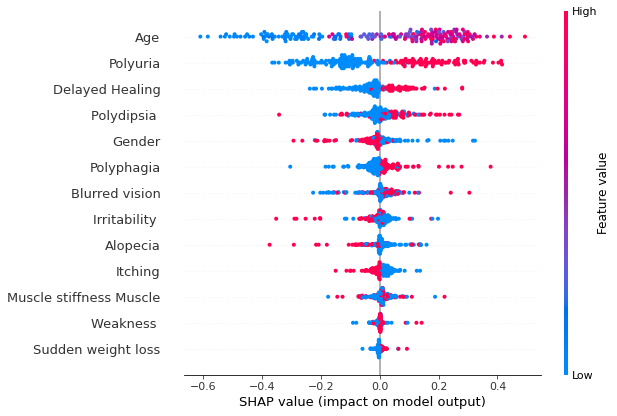

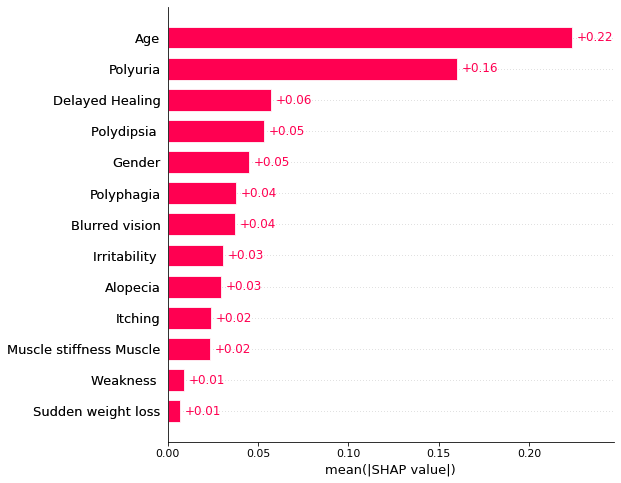

In [24]:
values = show_shap(tree)
shap_data = shap_value_data(values, shap_data)

###**Random Forest**

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Permutation explainer: 217it [00:51,  4.25it/s]


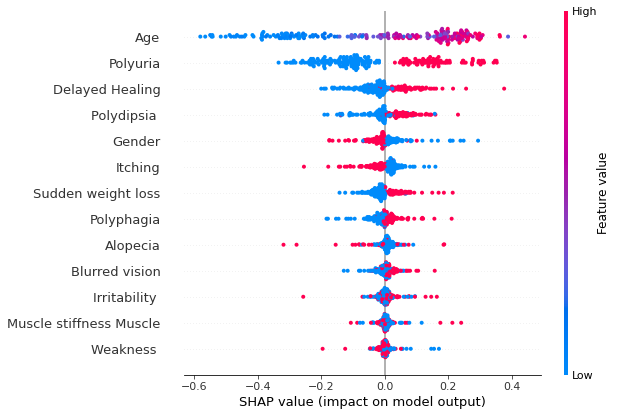

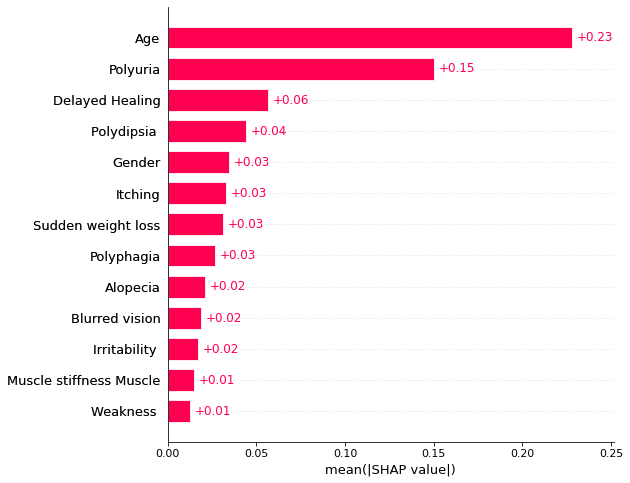

In [26]:
values = show_shap(rf)
shap_data = shap_value_data(values, shap_data)

###**Stochastic Gradient Descent**

In [27]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

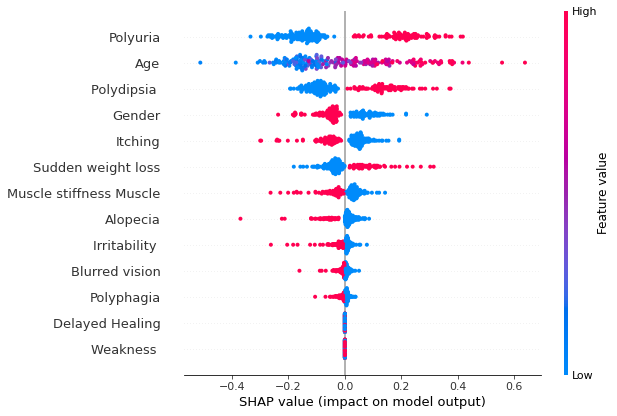

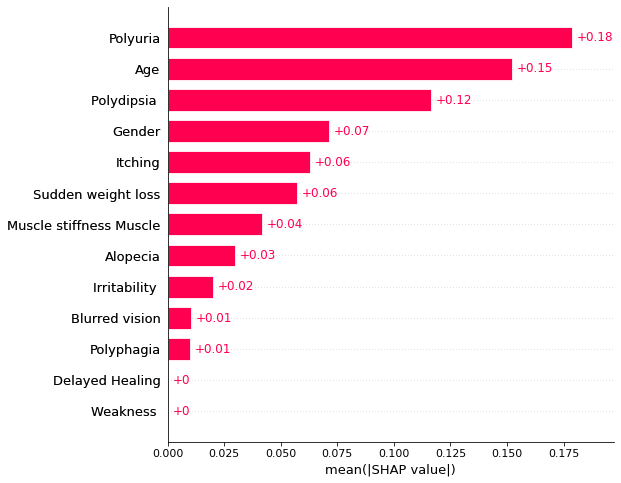

In [28]:
values = show_shap(sgd)
shap_data = shap_value_data(values, shap_data)

###**Perceptron**

In [29]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

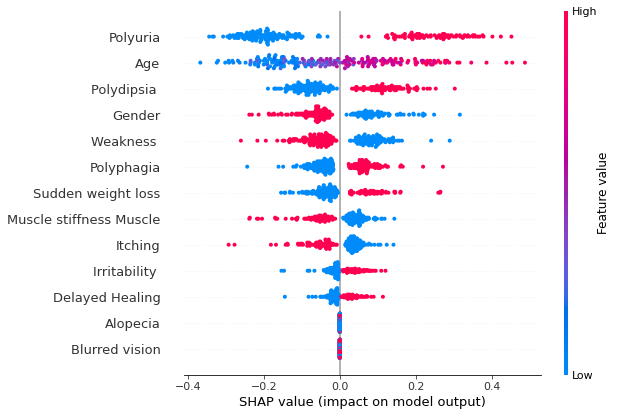

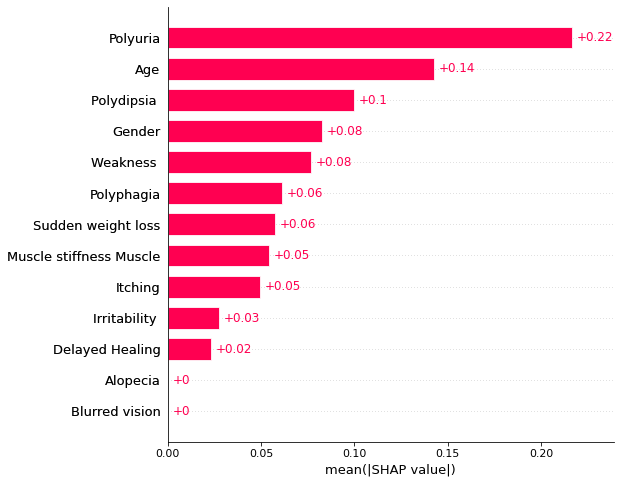

In [30]:
values = show_shap(perceptron)
shap_data = shap_value_data(values, shap_data)

###**AdaBoost**

In [31]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

Permutation explainer: 217it [00:41,  5.21it/s]


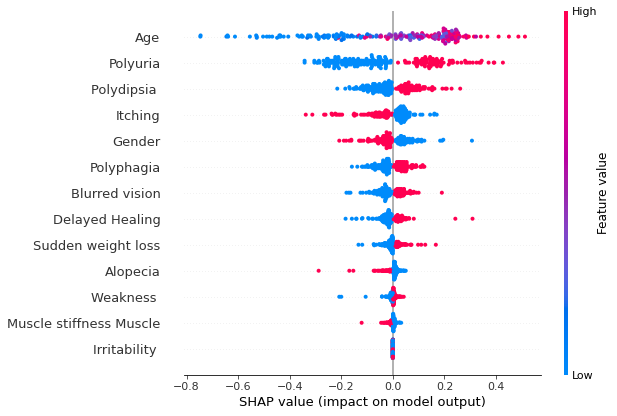

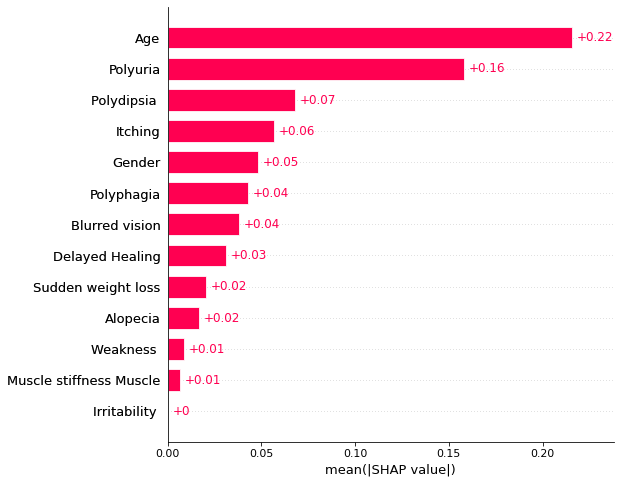

In [32]:
values = show_shap(adaboost)
shap_data = shap_value_data(values, shap_data)

###**XGBoost**

In [33]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Permutation explainer: 217it [00:12, 16.88it/s]


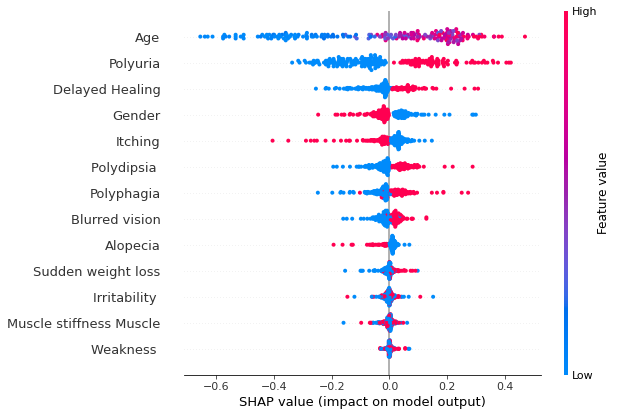

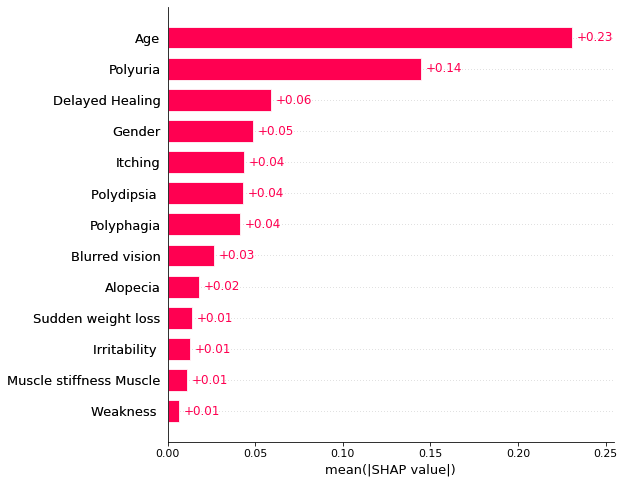

In [34]:
values = show_shap(xg)
shap_data = shap_value_data(values, shap_data)

###**PassiveAggressiveClassifier**

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier()
pac.fit(x_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

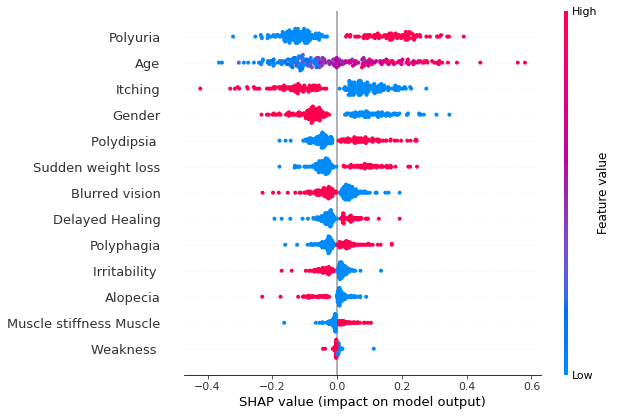

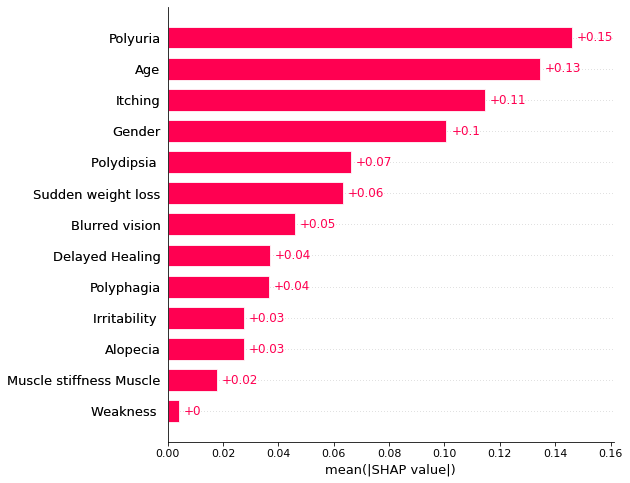

In [36]:
values = show_shap(pac)
shap_data = shap_value_data(values, shap_data)

###**RidgeClassifier**

In [37]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()
ridge.fit(x_train, y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

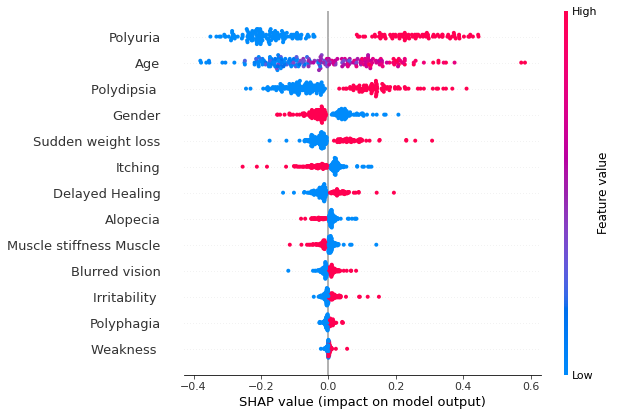

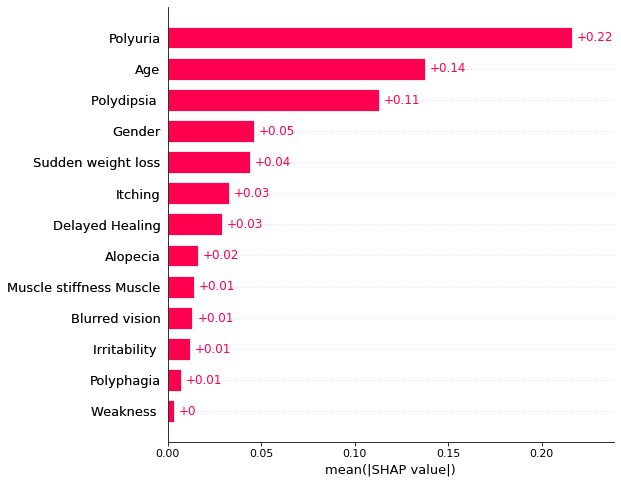

In [38]:
values = show_shap(ridge)
shap_data = shap_value_data(values, shap_data)

###**Nu-Support Vector Classifier**

In [39]:
from sklearn.svm import NuSVC
nu_svc = NuSVC()
nu_svc.fit(x_train, y_train)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

Permutation explainer: 217it [00:57,  3.80it/s]


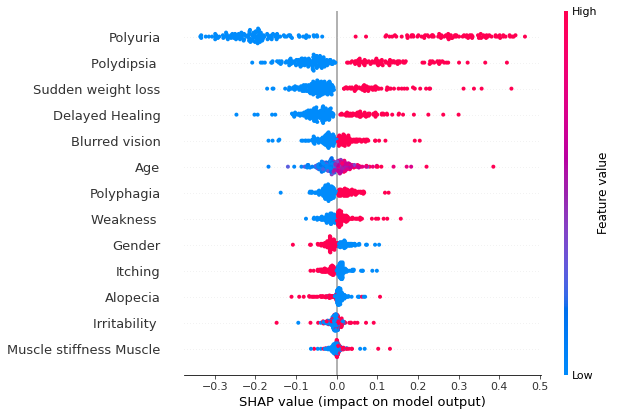

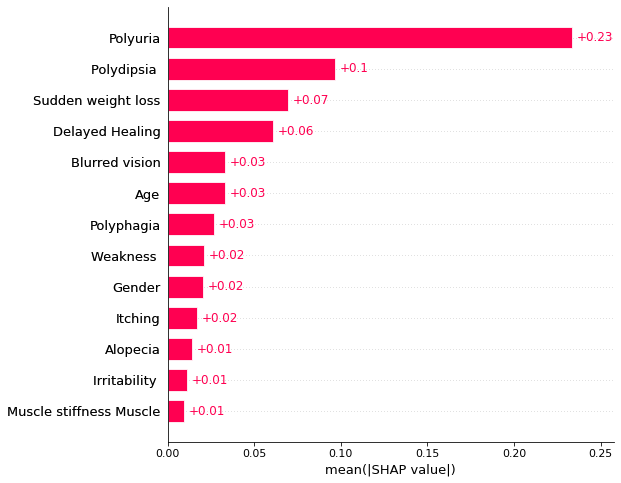

In [40]:
values = show_shap(nu_svc)
shap_data = shap_value_data(values, shap_data)

###**Linear Support Vector Classifier**

In [41]:
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(x_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

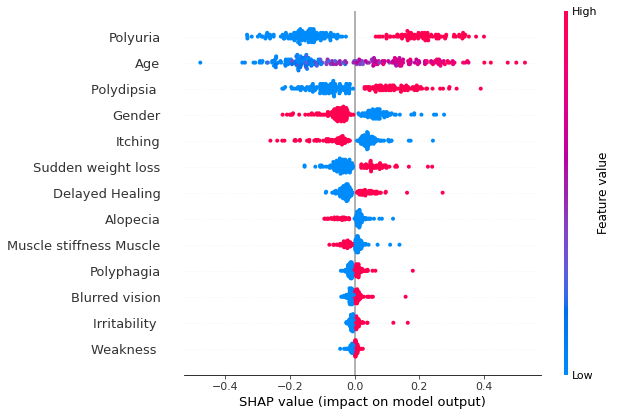

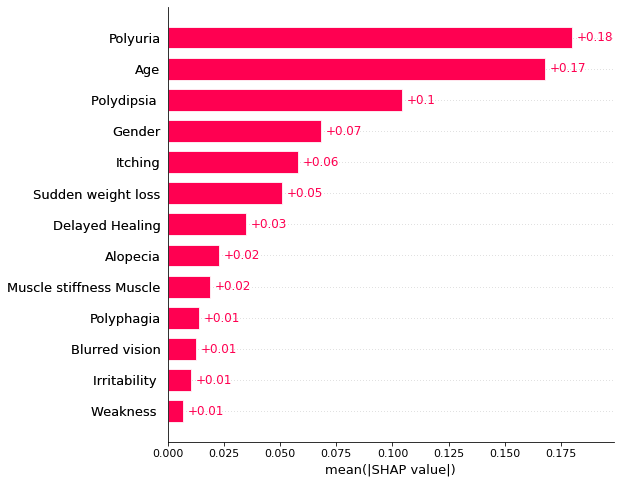

In [42]:
values = show_shap(lin_svc)
shap_data = shap_value_data(values, shap_data)

###**CalibratedClassifierCV**

In [43]:
from sklearn.calibration import CalibratedClassifierCV
calCV = CalibratedClassifierCV()
calCV.fit(x_train, y_train)

CalibratedClassifierCV(base_estimator=None, cv=None, method='sigmoid')

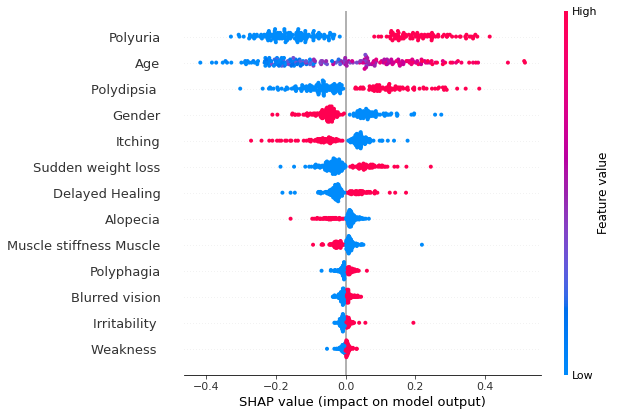

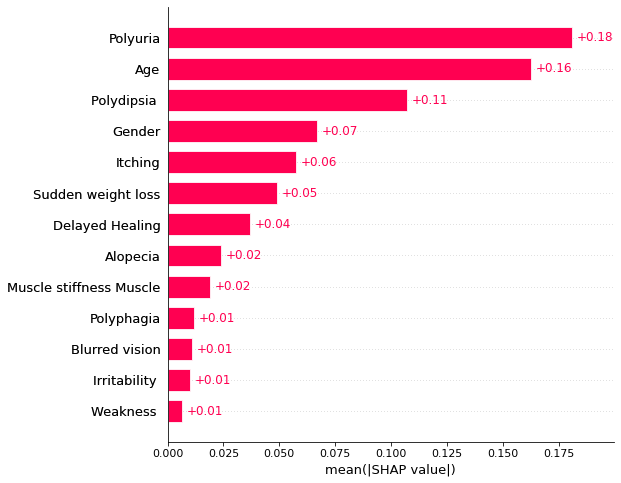

In [44]:
values = show_shap(calCV)
shap_data = shap_value_data(values, shap_data)

###**Nearest Centroid**

In [45]:
from sklearn.neighbors import NearestCentroid
nc = NearestCentroid()
nc.fit(x_train, y_train)

NearestCentroid(metric='euclidean', shrink_threshold=None)

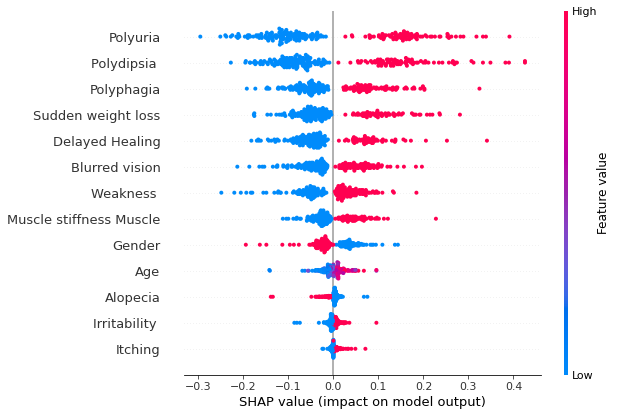

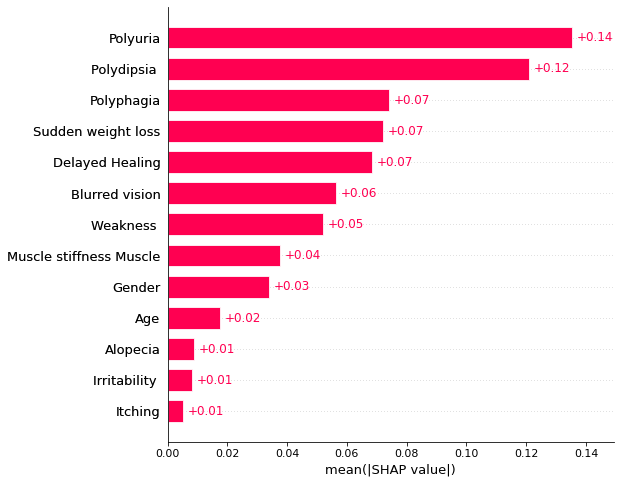

In [46]:
values = show_shap(nc)
shap_data = shap_value_data(values, shap_data)

###**Gaussian Process Classifier**

In [47]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
gpc.fit(x_train,y_train)

GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=100,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=False)

Permutation explainer: 217it [02:23,  1.51it/s]


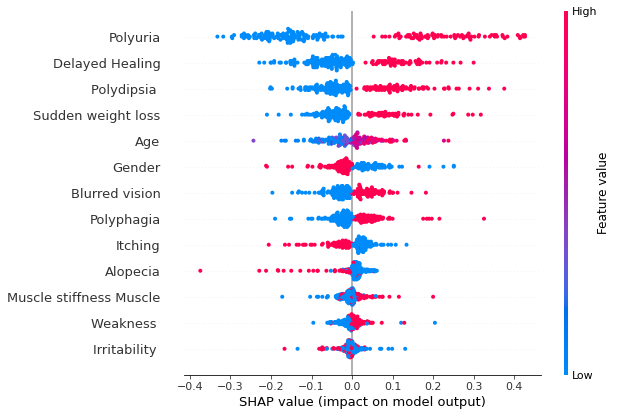

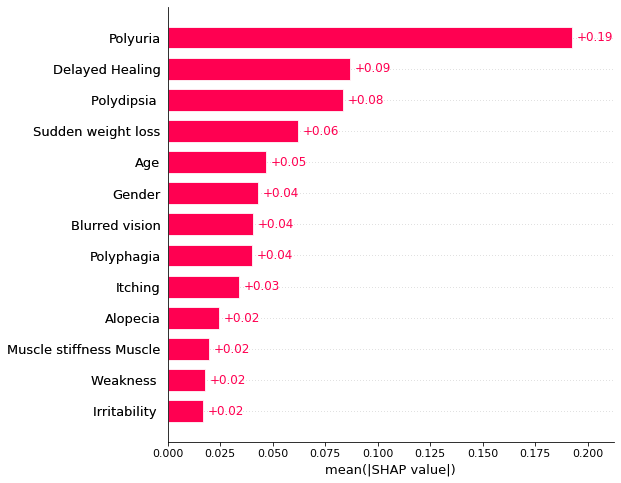

In [48]:
values = show_shap(gpc)
shap_data = shap_value_data(values, shap_data)

###**MultinomialNB**

In [49]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

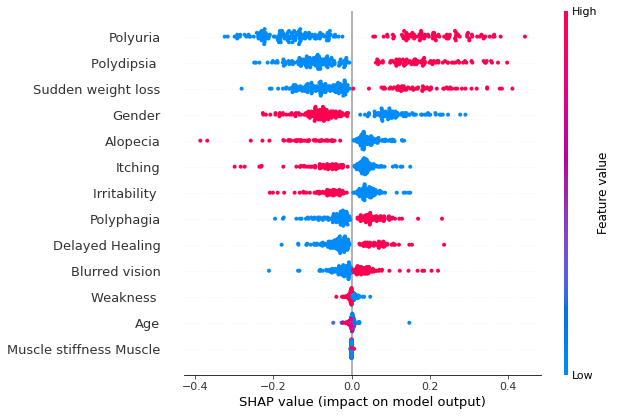

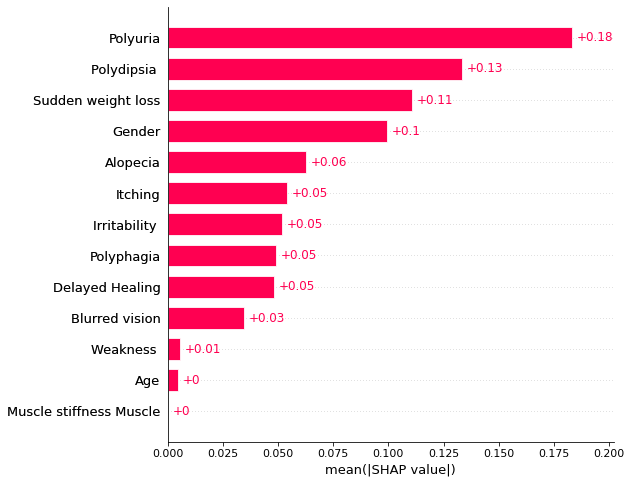

In [50]:
values = show_shap(mnb)
shap_data = shap_value_data(values, shap_data)

###**ComplementNB**

In [51]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB()
cnb.fit(x_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

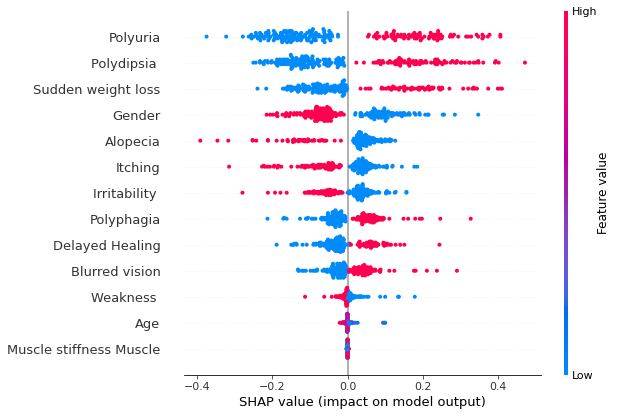

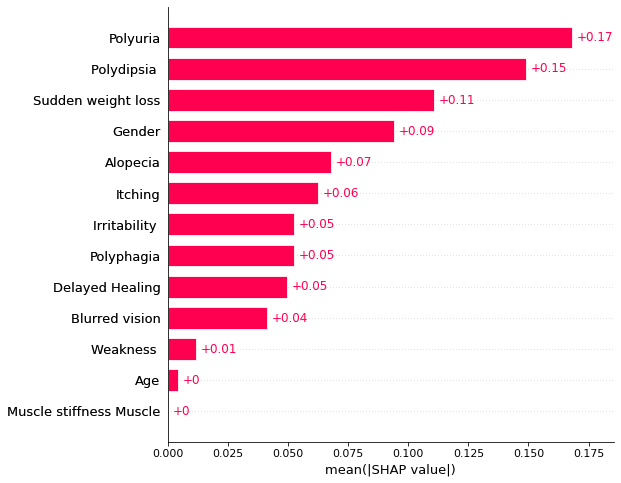

In [52]:
values = show_shap(cnb)
shap_data = shap_value_data(values, shap_data)

###**BernoulliNB**

In [53]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

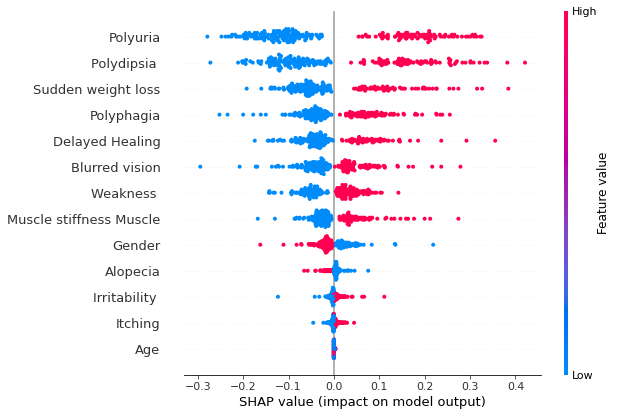

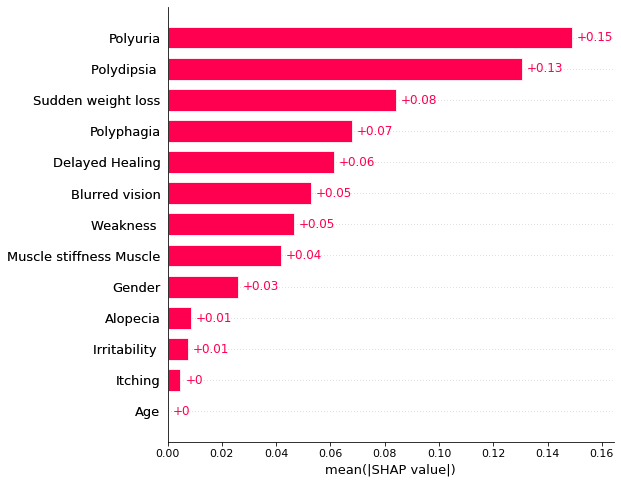

In [54]:
values =  show_shap(bnb)
shap_data = shap_value_data(values, shap_data)

###**CategoricalNB**

In [55]:
from sklearn.naive_bayes import CategoricalNB
ca_nb = CategoricalNB()
ca_nb.fit(x_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

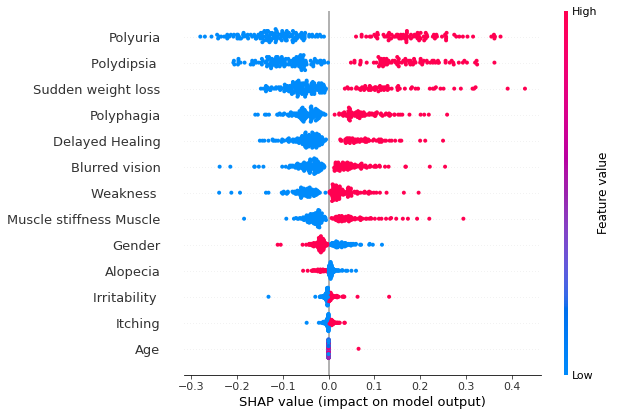

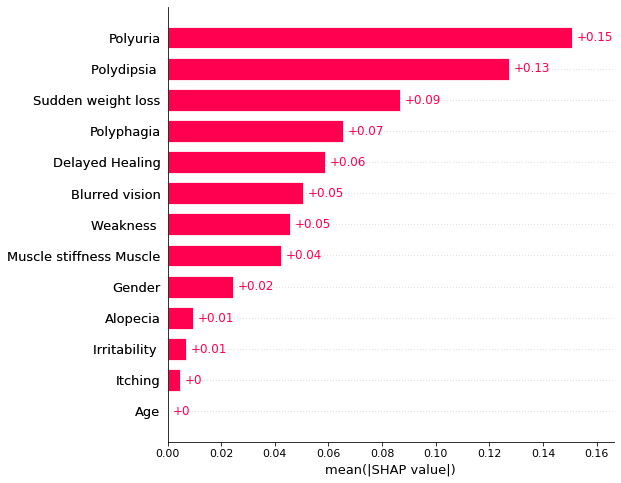

In [56]:
values = show_shap(ca_nb)
shap_data = shap_value_data(values, shap_data)

###**BaggingClassifier**

In [57]:
from sklearn.ensemble import BaggingClassifier
bag_c = BaggingClassifier()
bag_c.fit(x_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

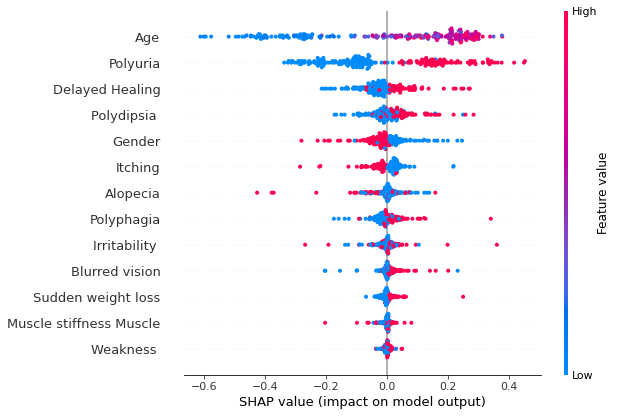

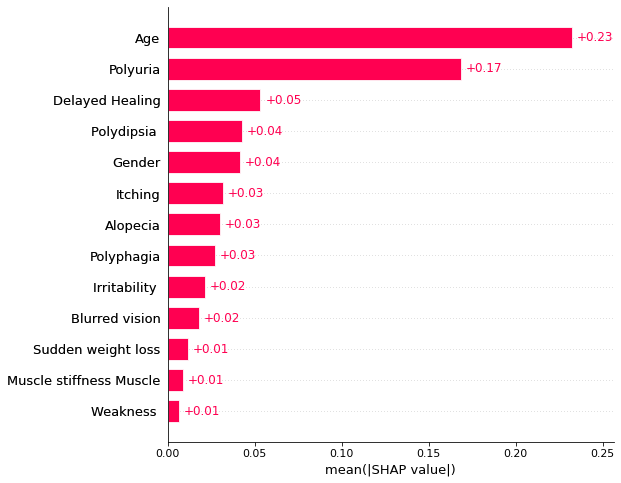

In [58]:
values = show_shap(bag_c)
shap_data = shap_value_data(values, shap_data)

###**ExtraTreesClassifier**

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
ex_tree = ExtraTreesClassifier()
ex_tree.fit(x_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Permutation explainer: 217it [00:54,  4.00it/s]


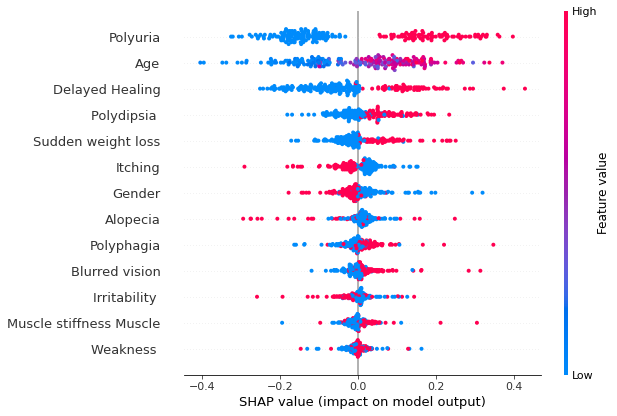

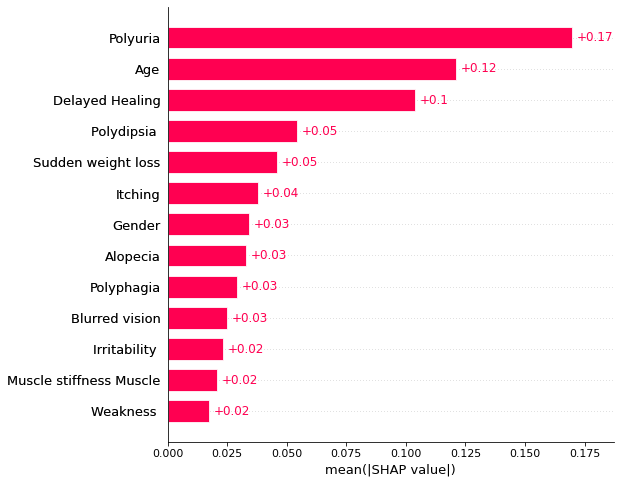

In [60]:
values = show_shap(ex_tree)
shap_data = shap_value_data(values, shap_data)

###**GradientBoostingClassifier**

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

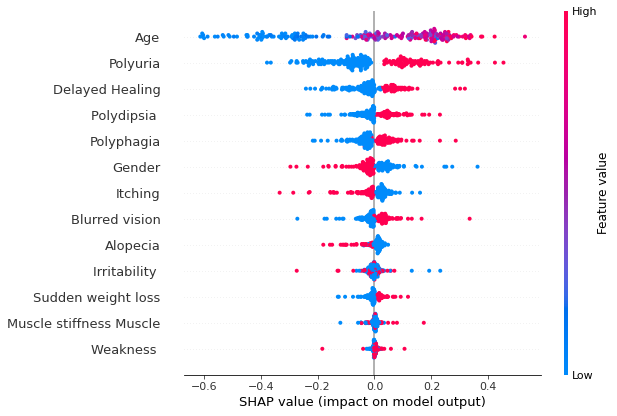

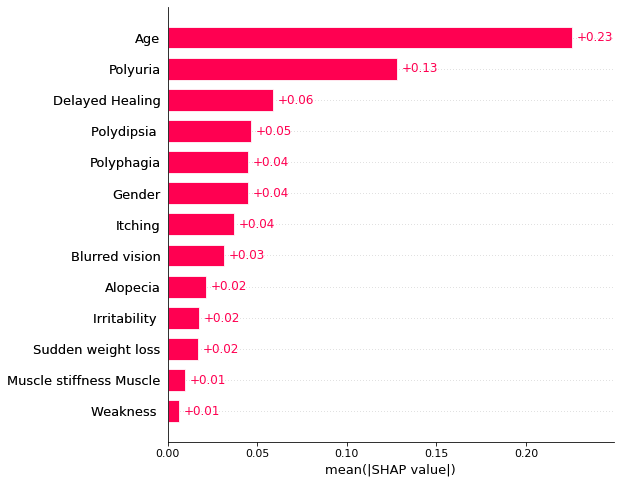

In [62]:
values = show_shap(gbc)
shap_data = shap_value_data(values, shap_data)

###**HistGradiantBoostingClassifier**

In [63]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(x_train, y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

Permutation explainer: 217it [00:22,  9.57it/s]


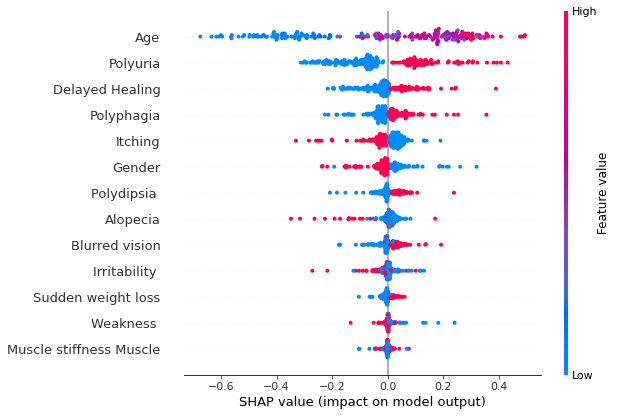

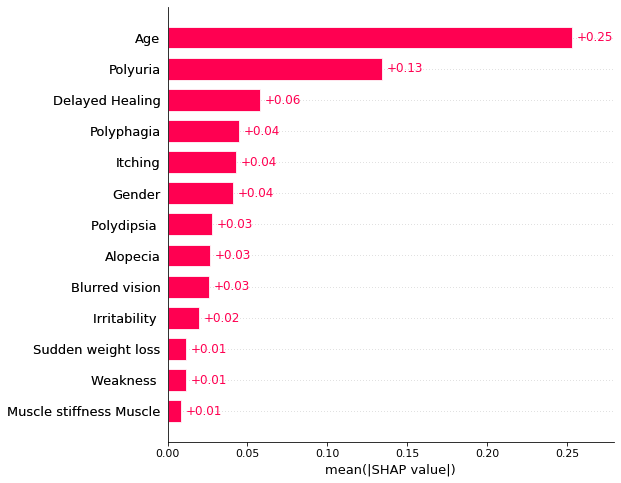

In [64]:
values = show_shap(hgbc)
shap_data = shap_value_data(values, shap_data)

###**OneVsRest Classifier**

In [65]:
from sklearn.multiclass import OneVsRestClassifier
one = OneVsRestClassifier(SVC())
one.fit(x_train, y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

Permutation explainer: 217it [00:39,  5.50it/s]


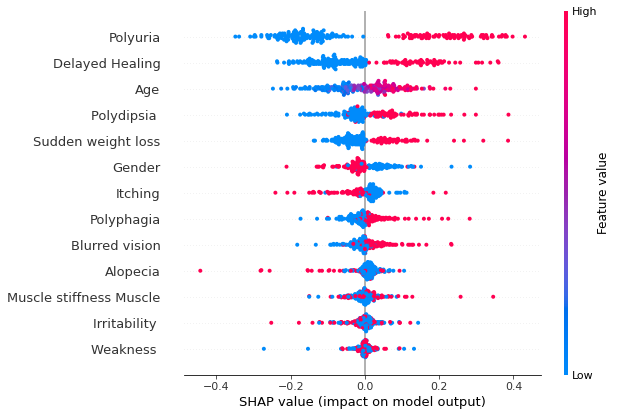

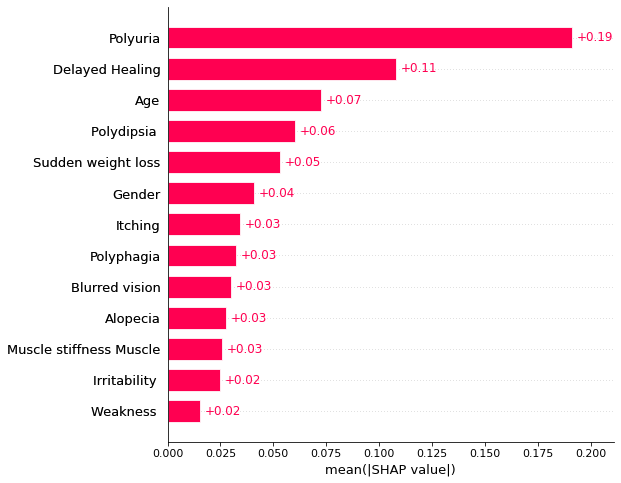

In [66]:
values =show_shap(one)
shap_data = shap_value_data(values, shap_data)

###**MLPClassifier**

In [67]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

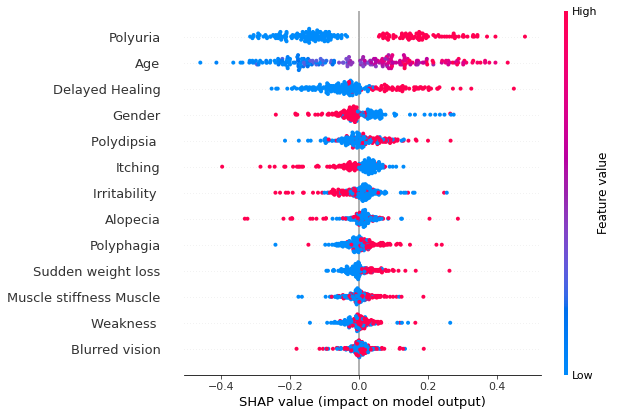

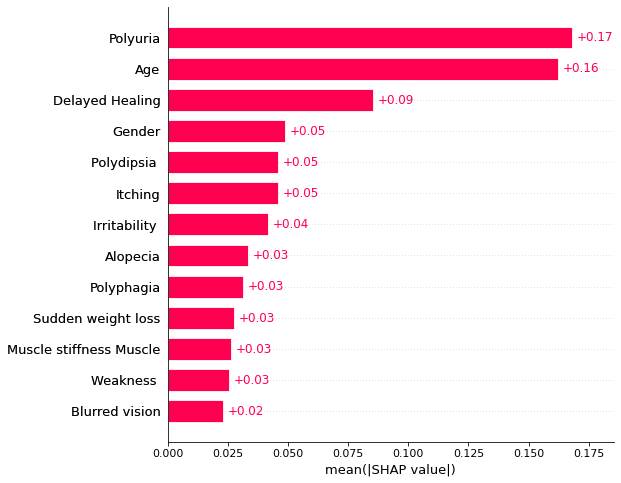

In [68]:
values = show_shap(mlp)
shap_data = shap_value_data(values, shap_data)

###**LabelPropagation**

In [69]:
from sklearn.semi_supervised import LabelPropagation
label = LabelPropagation()
label.fit(x_train, y_train)

LabelPropagation(gamma=20, kernel='rbf', max_iter=1000, n_jobs=None,
                 n_neighbors=7, tol=0.001)

Permutation explainer: 217it [01:51,  1.95it/s]


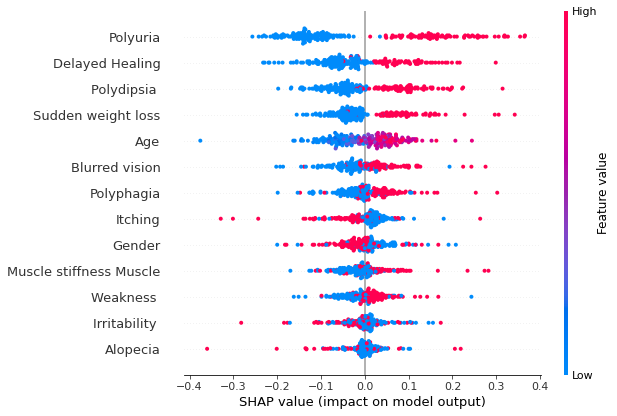

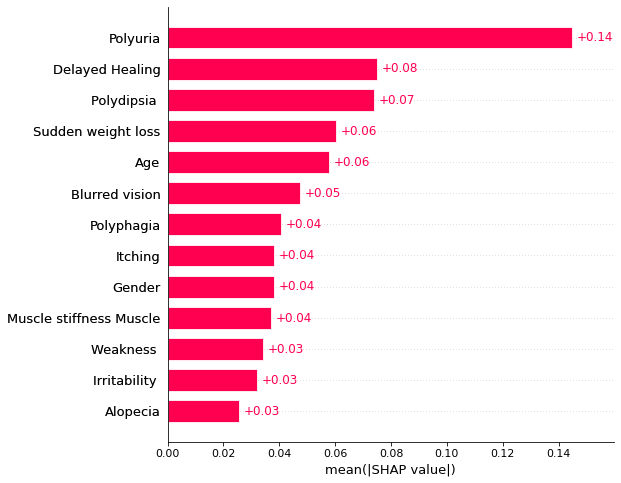

In [70]:
values = show_shap(label)
shap_data = shap_value_data(values, shap_data)

###**LabelSpreading**

In [71]:
from sklearn.semi_supervised import LabelSpreading
label_s = LabelSpreading()
label_s.fit(x_train, y_train)

LabelSpreading(alpha=0.2, gamma=20, kernel='rbf', max_iter=30, n_jobs=None,
               n_neighbors=7, tol=0.001)

Permutation explainer: 217it [01:51,  1.94it/s]


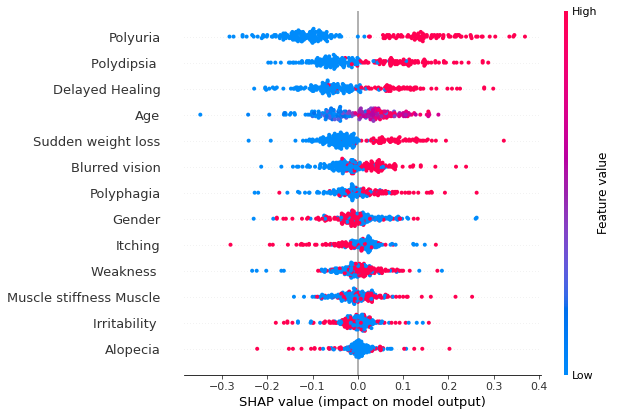

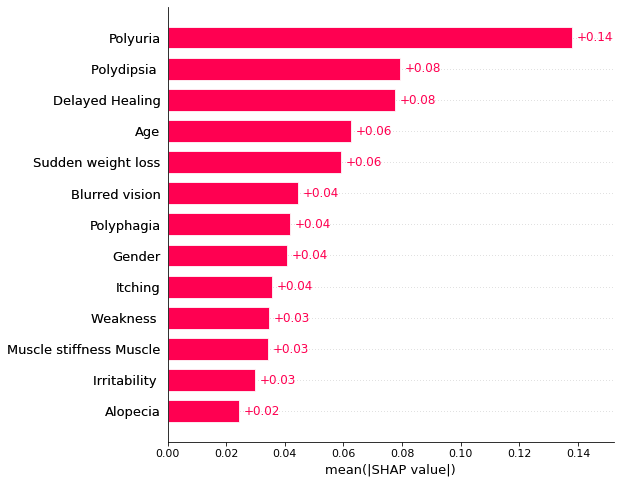

In [72]:
values = show_shap(label_s)
shap_data = shap_value_data(values, shap_data)

###**StackingClassifier**

In [73]:
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(x_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                     

Permutation explainer: 217it [00:17, 12.71it/s]                         


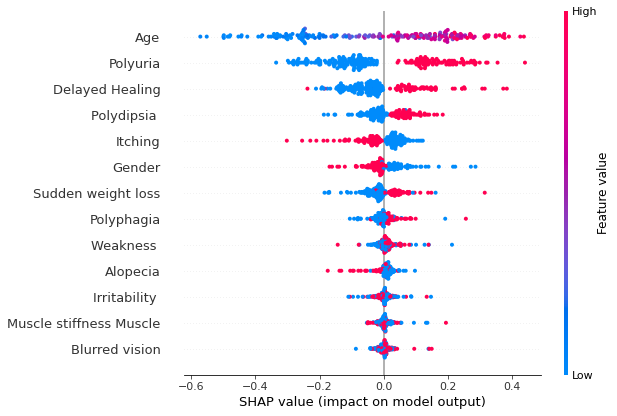

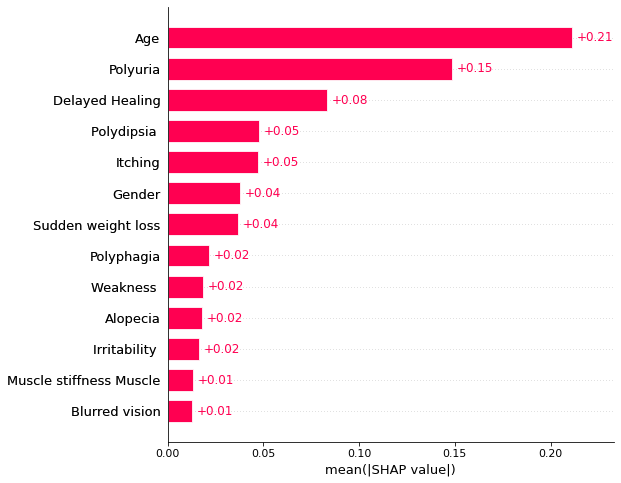

In [74]:
values = show_shap(sclf)
shap_data = shap_value_data(values, shap_data)

###**RidgeClassifierCV**

In [75]:
from sklearn.linear_model import RidgeClassifierCV
ridge_cv = RidgeClassifierCV()
ridge_cv.fit(x_train, y_train)

RidgeClassifierCV(alphas=array([ 0.1,  1. , 10. ]), class_weight=None, cv=None,
                  fit_intercept=True, normalize=False, scoring=None,
                  store_cv_values=False)

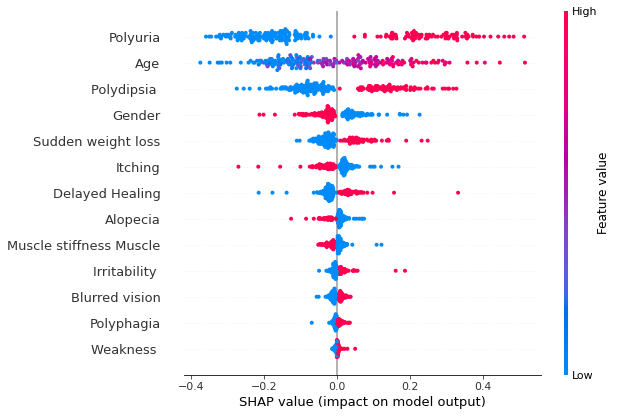

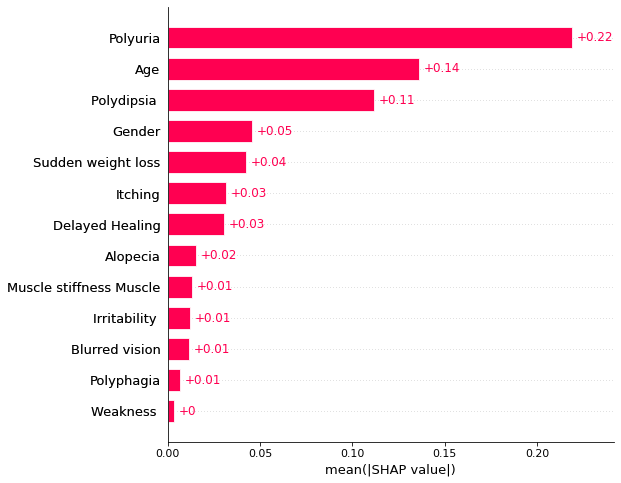

In [76]:
values = show_shap(ridge_cv)
shap_data = shap_value_data(values, shap_data)

###**LogisticRegressionCV**

In [77]:
from sklearn.linear_model import LogisticRegressionCV
log_cv = LogisticRegressionCV()
log_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

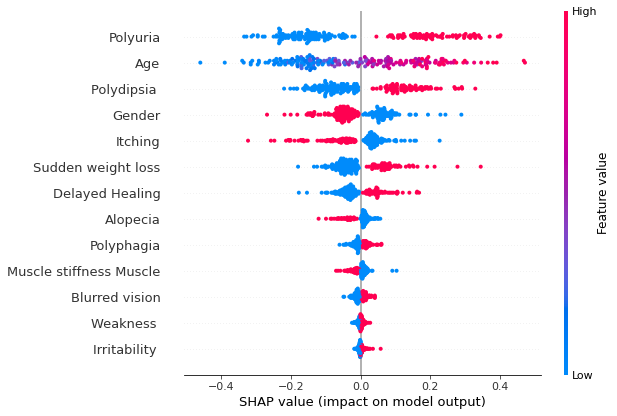

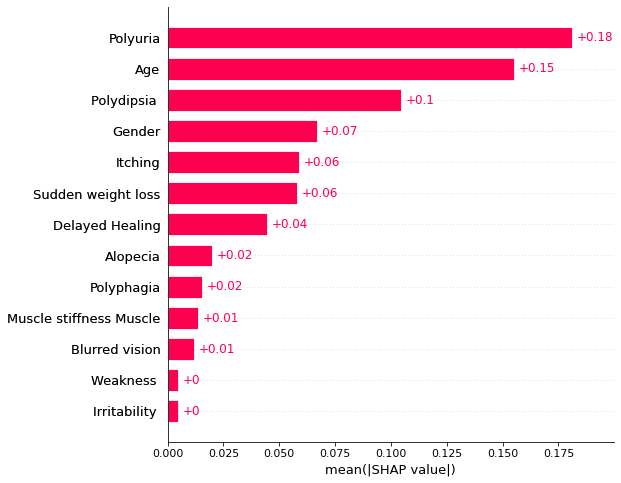

In [78]:
values = show_shap(log_cv)
shap_data = shap_value_data(values, shap_data)

###**LinearDiscriminantAnalysis**

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
linda = LinearDiscriminantAnalysis()
linda.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

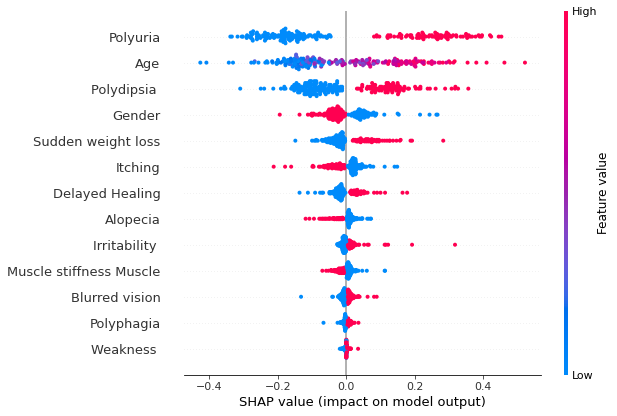

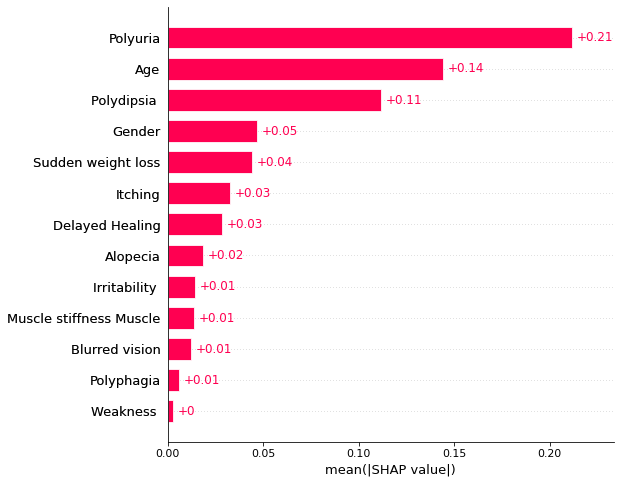

In [80]:
values = show_shap(linda)
shap_data = shap_value_data(values, shap_data)

###**QuadraticDiscriminantAnalysis**

In [81]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
quada = QuadraticDiscriminantAnalysis()
quada.fit(x_train,y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

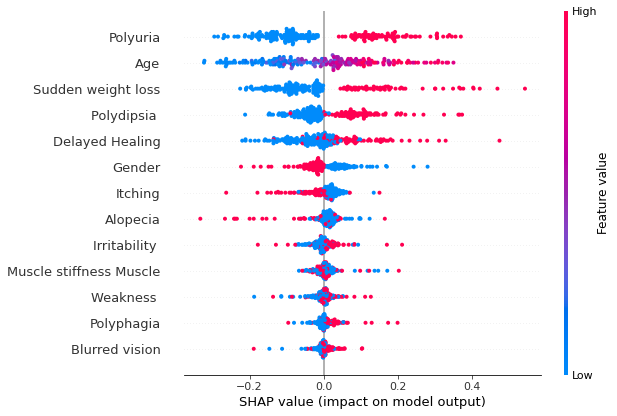

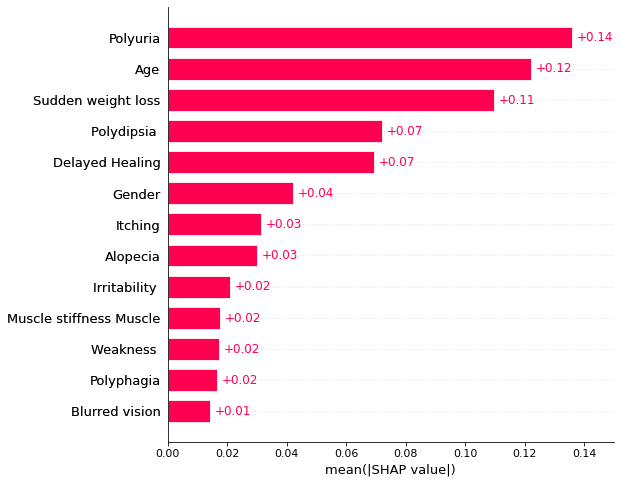

In [82]:
values = show_shap(quada)
shap_data = shap_value_data(values, shap_data)

In [83]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

Permutation explainer: 217it [00:25,  8.54it/s]


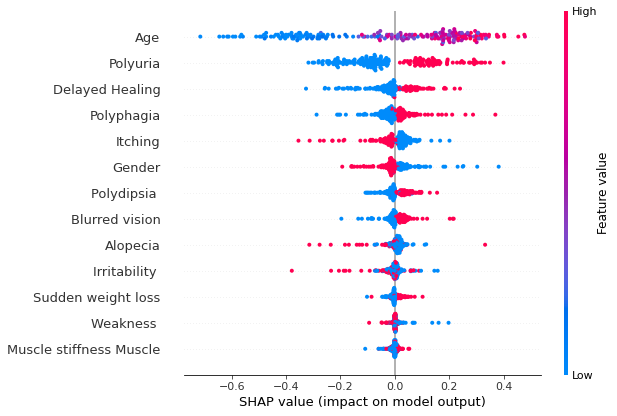

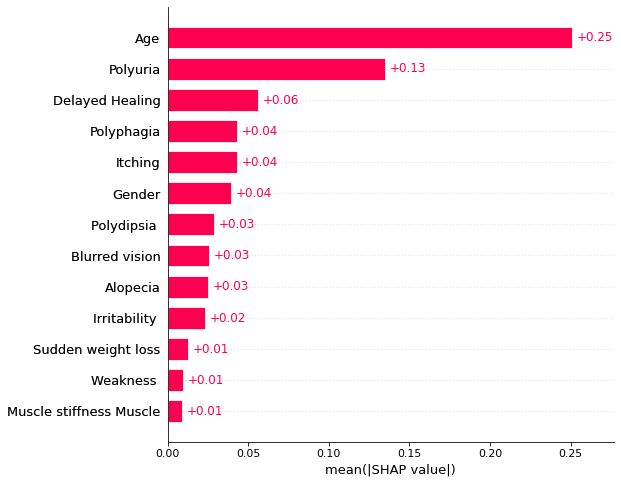

In [84]:
values = show_shap(lgbm)
shap_data = shap_value_data(values, shap_data)

In [85]:
shap_data

,Age,Gender,Polyuria,Polydipsia,Polyphagia,Sudden weight loss,Weakness,Delayed Healing,Blurred vision,Itching,Irritability,Muscle stiffness Muscle,Alopecia
0,0.126,0.059,0.196,0.109,0.017,0.063,0.007,0.049,0.016,0.057,0.004,0.008,0.019
1,0.069,0.048,0.121,0.089,0.039,0.062,0.034,0.068,0.050,0.037,0.030,0.035,0.029
2,0.073,0.040,0.191,0.060,0.031,0.054,0.015,0.111,0.031,0.034,0.025,0.024,0.029
3,0.073,0.018,0.151,0.107,0.047,0.103,0.037,0.043,0.034,0.004,0.006,0.025,0.011
4,0.224,0.045,0.160,0.054,0.038,0.007,0.009,0.057,0.037,0.024,0.030,0.024,0.029
5,0.228,0.035,0.150,0.044,0.027,0.031,0.013,0.056,0.019,0.033,0.017,0.015,0.021
6,0.152,0.071,0.179,0.117,0.010,0.057,0.000,0.000,0.010,0.063,0.020,0.042,0.030
7,0.143,0.083,0.217,0.100,0.061,0.057,0.077,0.023,0.000,0.049,0.028,0.054,0.000
8,0.216,0.048,0.158,0.068,0.043,0.020,0.009,0.031,0.038,0.057,0.000,0.007,0.016
9,0.231,0.049,0.145,0.043,0.041,0.014,0.007,0.059,0.026,0.044,0.013,0.011,0.018


In [86]:
shap_data.to_excel('/content/shap_combined.xlsx')